# Saving a network to a file

Save a `cityseer` prepared `networkx` graph to a file.

To save a graph or to visualise it from QGIS, convert it to a `GeoDataFrame` and save it using `geopandas`.

First, let's create a simple OSM graph from a bounding box, using the same approach as before.


In [1]:
from shapely import geometry

from cityseer.tools import io

poly_wgs = geometry.box(
    -0.14115725966109327, 51.509220662095714, -0.12676440185383622, 51.51820111033659
)
G = io.osm_graph_from_poly(poly_wgs)
print(G)

INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
100%|██████████| 4017/4017 [00:00<00:00, 131748.45it/s]
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3719/3719 [00:00<00:00, 992530.96it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4017/4017 [00:00<00:00, 32732.22it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
100%|██████████| 3719/3719 [00:00<00:00, 34742.65it/s]
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.
I

MultiGraph with 382 nodes and 591 edges


Use the [`geopandas_from_nx`](https://cityseer.benchmarkurbanism.com/tools/io#geopandas-from-nx) function to convert the `networkx` dataset into a `geopandas` LineString `GeoDataFrame`.


In [2]:
streets_gpd = io.geopandas_from_nx(G)
streets_gpd

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.
INFO:cityseer.tools.util:Validating networkX graph for use with cityseer.


,names,routes,highways,levels,is_tunnel,is_bridge,geom,start_nd_key,end_nd_key,edge_idx
0,[beak street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698597.952...",108070,25473512,0
1,[beak street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698556.667...",108070,25473371,0
2,[kingly court],[],"[pedestrian, footway]",[0],True,False,"LINESTRING (698573.946 5710658.889, 698573.05 ...",108070,5568839679,0
3,[upper john street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698575.964...",108070,25473286,0
4,[great marlborough street],[],[tertiary],[0],False,False,"LINESTRING (698482.48 5710892.514, 698538.717 ...",9791491,21665965,0
...,...,...,...,...,...,...,...,...,...,...
586,[shaftesbury avenue],[a401],[primary],[0],False,False,"LINESTRING (699115.323 5710736.094, 699122.971...",12437|52103±10780|07806,21665|07806±12437|64252,0
587,[old compton street],[],[residential],[0],False,False,"LINESTRING (699053.594 5710800.488, 699102.554...",12437|87533±12437|87532,12437|93940±95129|52157,0
588,[bedford avenue],[],[residential],[0],False,False,"LINESTRING (699077.183 5711295.803, 699107.105...",14791186±8138324345±58111|24344,14791190±14791|73913,0
589,[adeline place],[],[residential],[0],False,False,"LINESTRING (699152.425 5711267.822, 699141.858...",14791186±8138324345±58111|24344,14791|57026±12374|61122,0


Since this is now a `geopandas` `GeoDataFrame`, you can use it accordingly.


<Axes: >

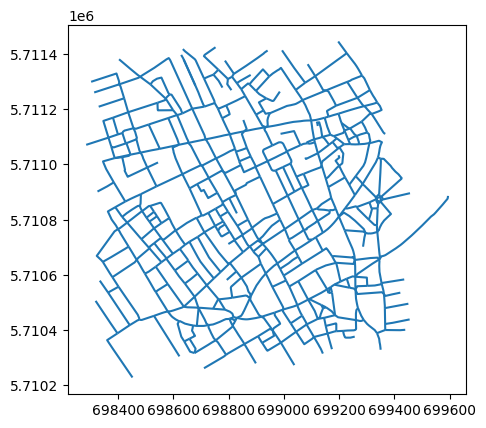

In [3]:
streets_gpd.plot()

`geopandas` can now be used to save the file to disk, it can then be accessed and edited from an application such as QGIS.


In [4]:
streets_gpd.to_file("temp/save_streets_demo.gpkg", driver="GPKG")

/Users/gareth/dev/benchmark-urbanism/cityseer-examples/.venv/lib/python3.11/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
INFO:pyogrio._io:Created 591 records
